# Libraries importing

In [141]:
import csv
from datetime import date
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor, MultiOutputClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, root_mean_squared_error
from statistics import mean
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import linalg
from sklearn.gaussian_process import kernels,GaussianProcessRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error, mean_absolute_percentage_error
import seaborn as sns

# Data loading

In [142]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

# Load the CSV file
file_path= '/content/drive/My Drive/shap_experiment/data'
df_processed_combined_data_daily = pd.read_csv(file_path+"/processed_combined_imputed_with_neighbors_df_processed_combined_data_daily.csv")

#df_aqi_daily.DateTime = pd.to_datetime(df_aqi_daily.DateTime)
df_processed_combined_data_daily.DateTime = pd.to_datetime(df_processed_combined_data_daily.DateTime)
df_PM10_daily = df_processed_combined_data_daily[['DateTime','Bjelave_PM10']]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataset Splitting

In [143]:
import matplotlib.pyplot as plt
def train_test_split(df, date):
    df = df.copy()
    train_data = df[df['DateTime'] < date].copy()
    test_data = df[df['DateTime'] >= date].copy() # df.DateTime = df.DateTime.dt.strftime('%d/%m/%Y %H:%M')
    return train_data, test_data

def train_test_split_from_to(df, start_date, end_date, slice_date):
    df = df.copy()
    train_data = df[(df['DateTime'] >= start_date) & (df['DateTime'] < slice_date)].copy()
    test_data = df[(df['DateTime'] >= slice_date) & (df['DateTime'] <= end_date)].copy()
    return train_data, test_data

def plot_train_test_data(train_data, test_data, date_column, label):
    plt.figure(figsize=(20,10))
    plt.plot(train_data[date_column], train_data[label], color='blue', label='Train Data')
    plt.plot(test_data[date_column], test_data[label], color='orange', label='Test Data')
    plt.xlabel(date_column)
    plt.ylabel(label)
    plt.title(label + ' Train and Test Data')
    plt.legend()
    plt.show()

In [144]:
def plot_boxplot(prediction_data, test_data):
    error = abs(prediction_data - test_data)
    # plot boxplot of error
    plt.figure(figsize=(10,6))
    plt.boxplot(error)
    plt.show()

In [145]:
#input window = 30
date = df_processed_combined_data_daily['DateTime'].max() - pd.Timedelta(days=34)
train_data_combined_ws_thirty, test_data_combined_ws_thirty = train_test_split(df_processed_combined_data_daily, date) #
#df_PM10_daily
train_PM10_daily_ws_thirty, test_PM10_daily_ws_thirty = train_test_split(df_PM10_daily, date)

#input window = 60
date = df_processed_combined_data_daily['DateTime'].max() - pd.Timedelta(days=64)
train_data_combined_ws_sixty, test_data_combined_ws_sixty = train_test_split(df_processed_combined_data_daily, date)
train_PM10_daily_ws_sixty, test_PM10_daily_ws_sixty = train_test_split(df_PM10_daily, date)

#input window = 90
date = df_processed_combined_data_daily['DateTime'].max() - pd.Timedelta(days=94)
train_data_combined_ws_ninety, test_data_combined_ws_ninety = train_test_split(df_processed_combined_data_daily, date)
train_PM10_daily_ws_ninety, test_PM10_daily_ws_ninety = train_test_split(df_PM10_daily, date) #

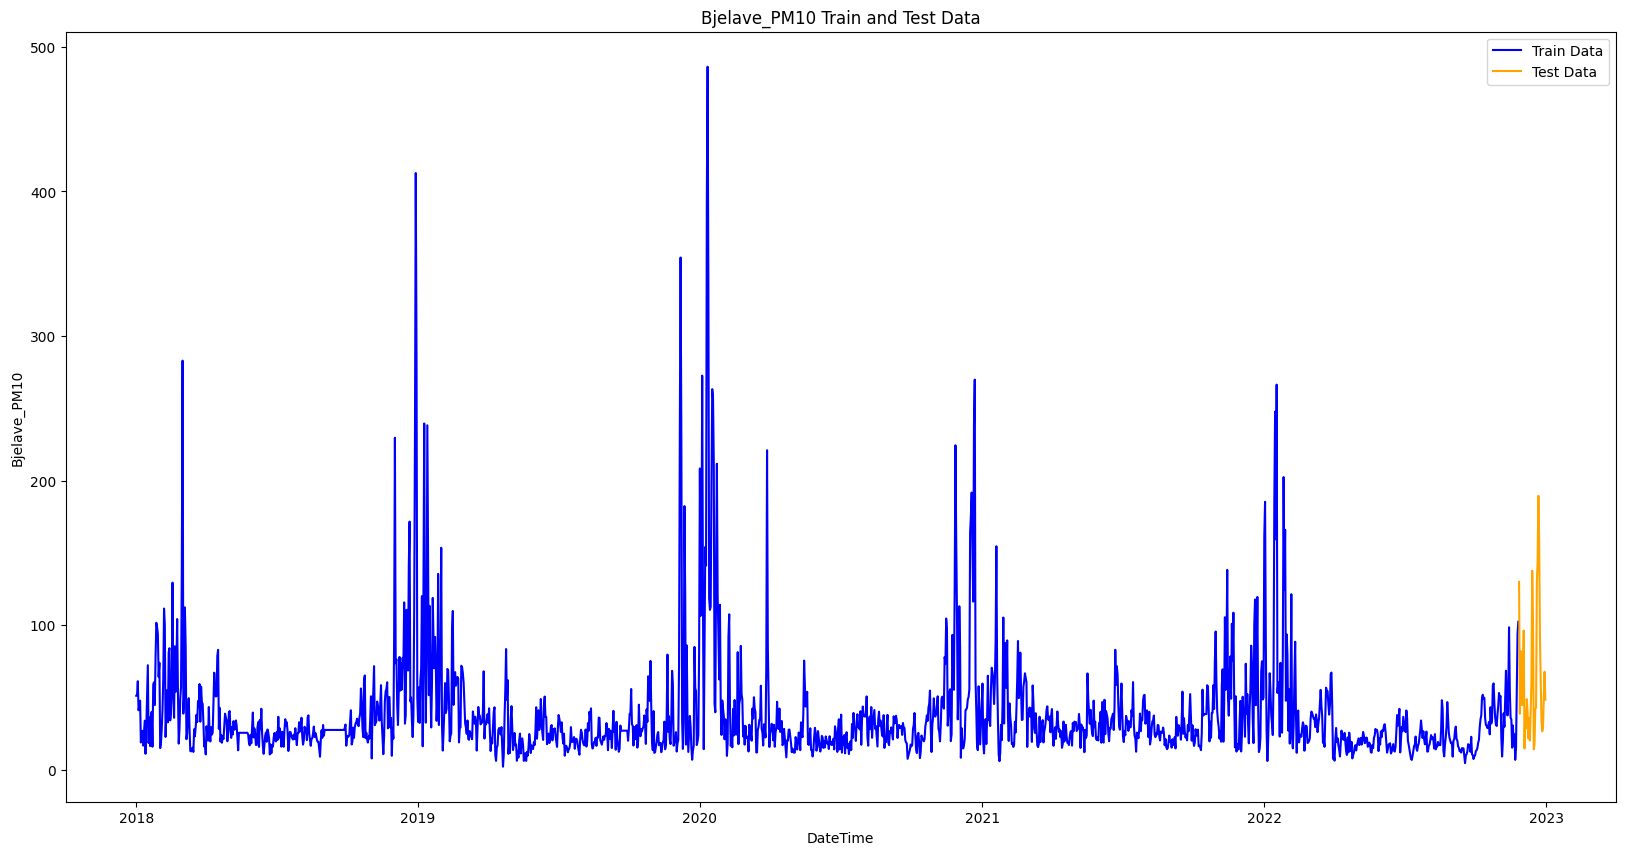

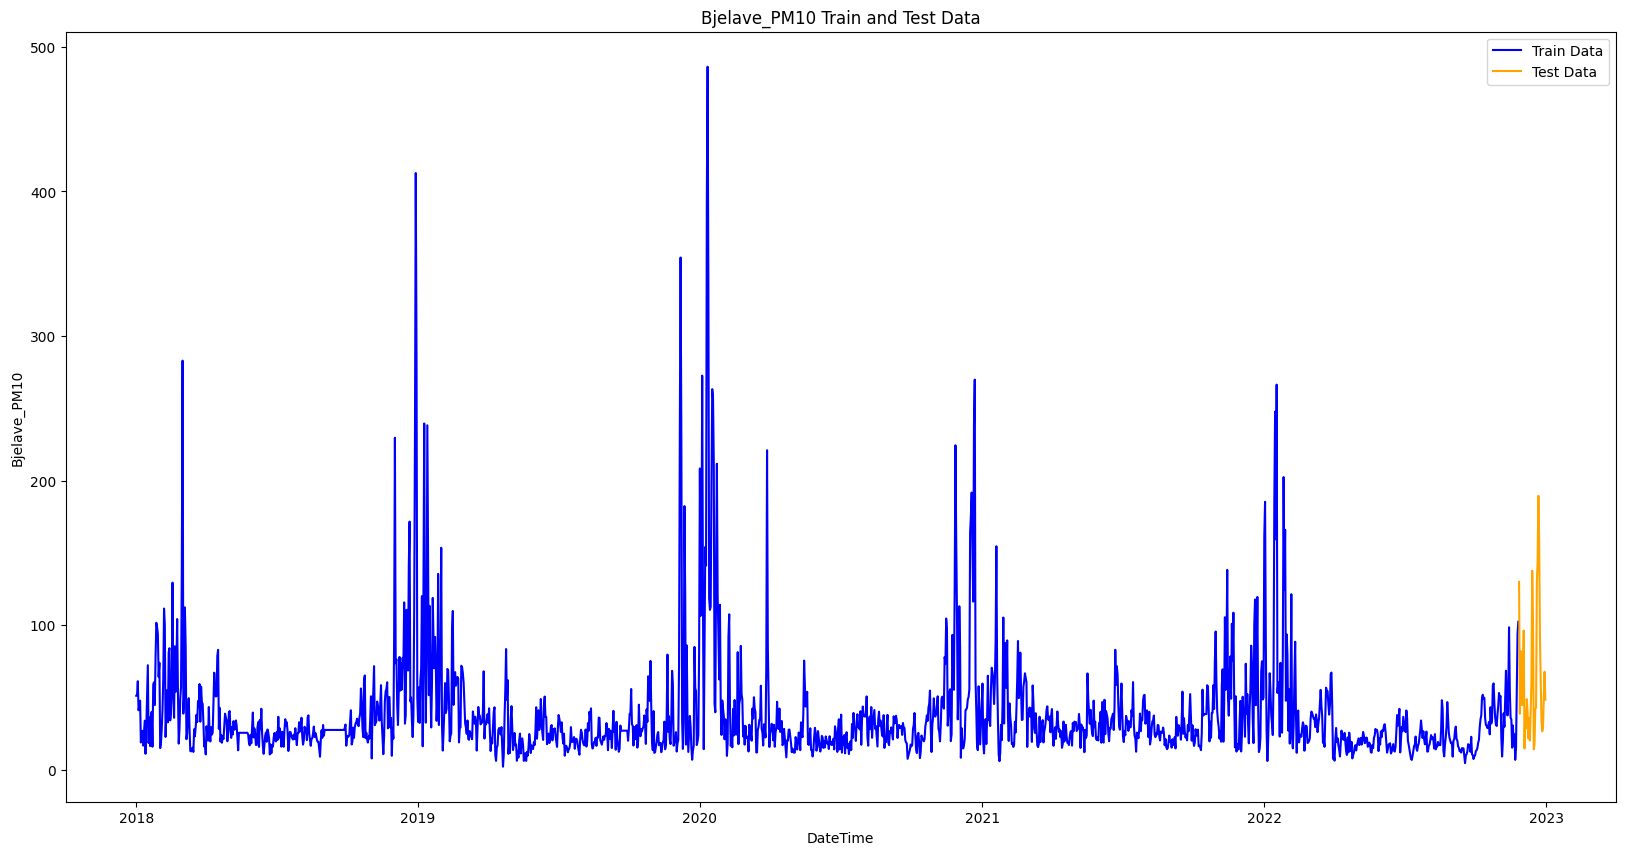

In [146]:
plot_train_test_data(train_data_combined_ws_thirty, test_data_combined_ws_thirty, 'DateTime', 'Bjelave_PM10')
plot_train_test_data(train_PM10_daily_ws_thirty, test_PM10_daily_ws_thirty, 'DateTime', 'Bjelave_PM10')


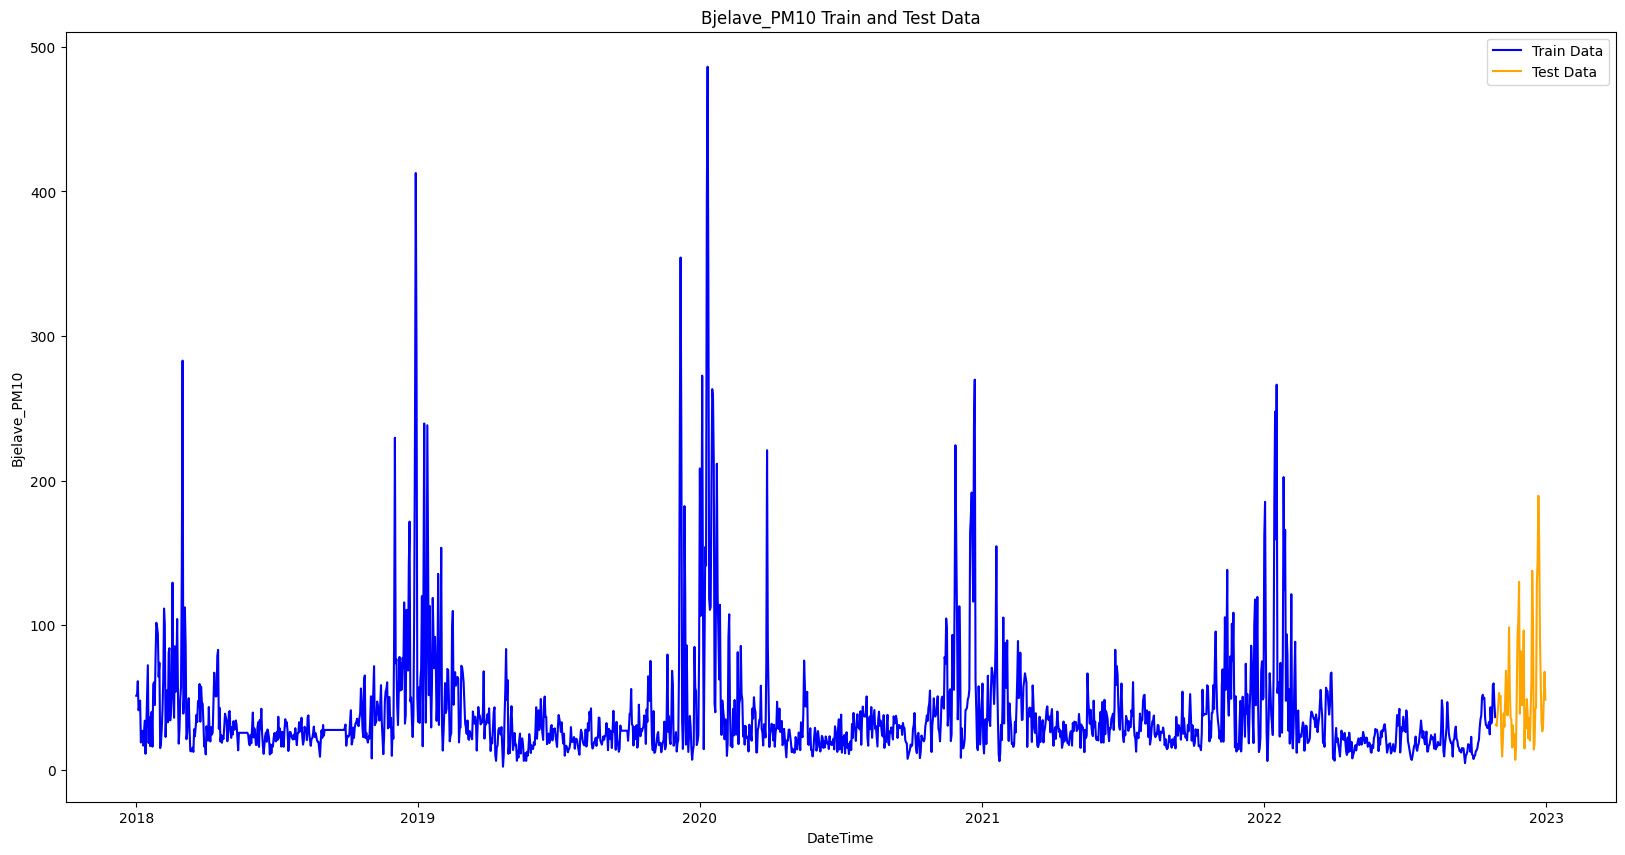

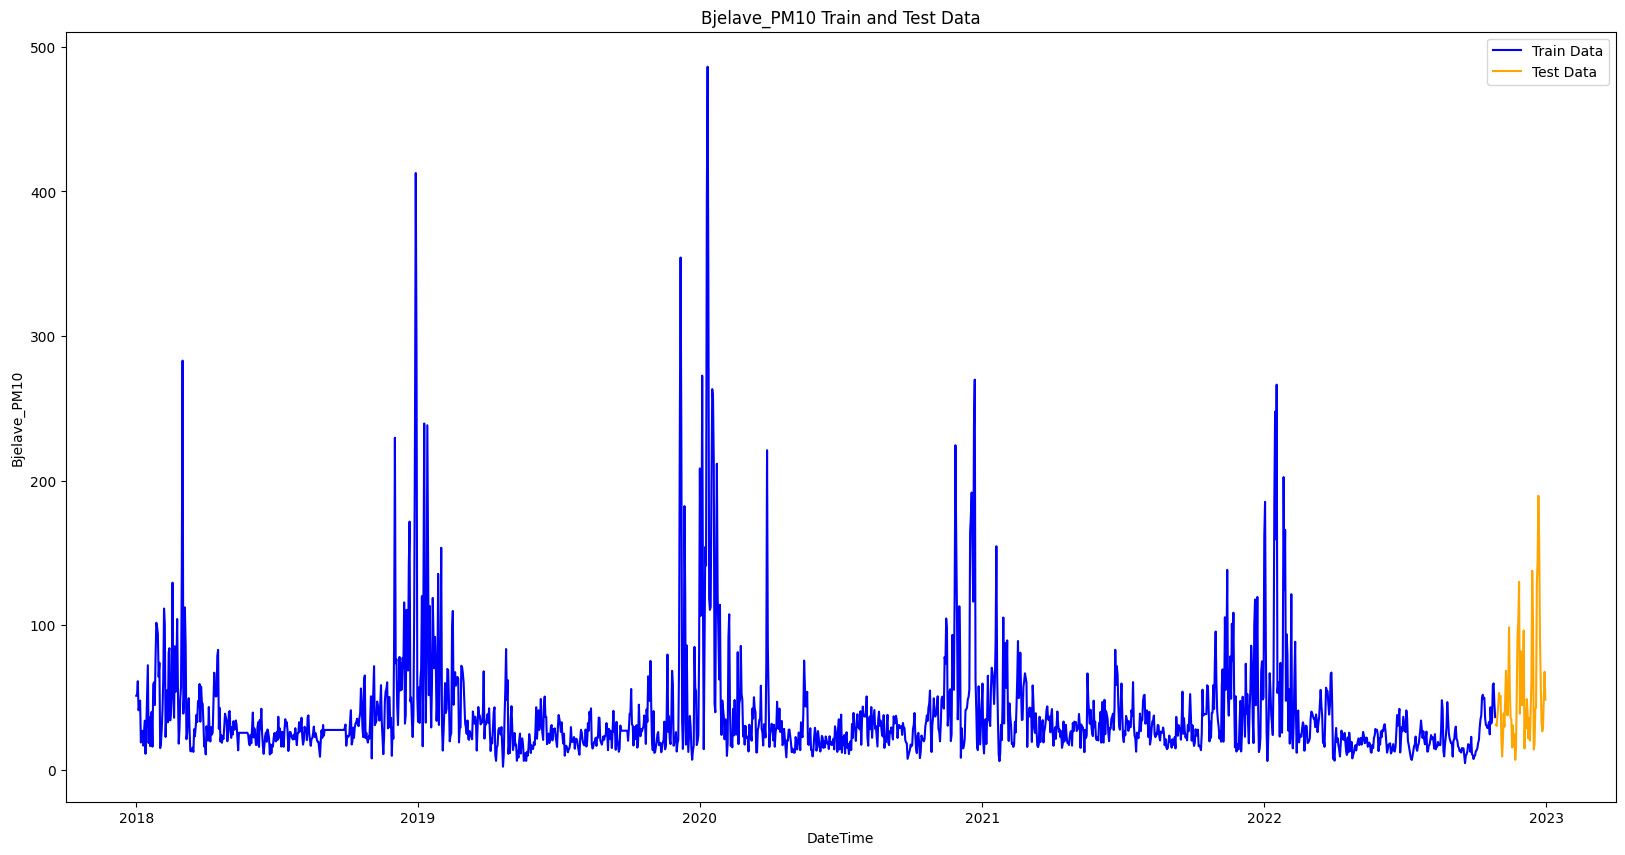

In [147]:
plot_train_test_data(train_data_combined_ws_sixty, test_data_combined_ws_sixty, 'DateTime', 'Bjelave_PM10')
plot_train_test_data(train_PM10_daily_ws_sixty, test_PM10_daily_ws_sixty, 'DateTime', 'Bjelave_PM10')

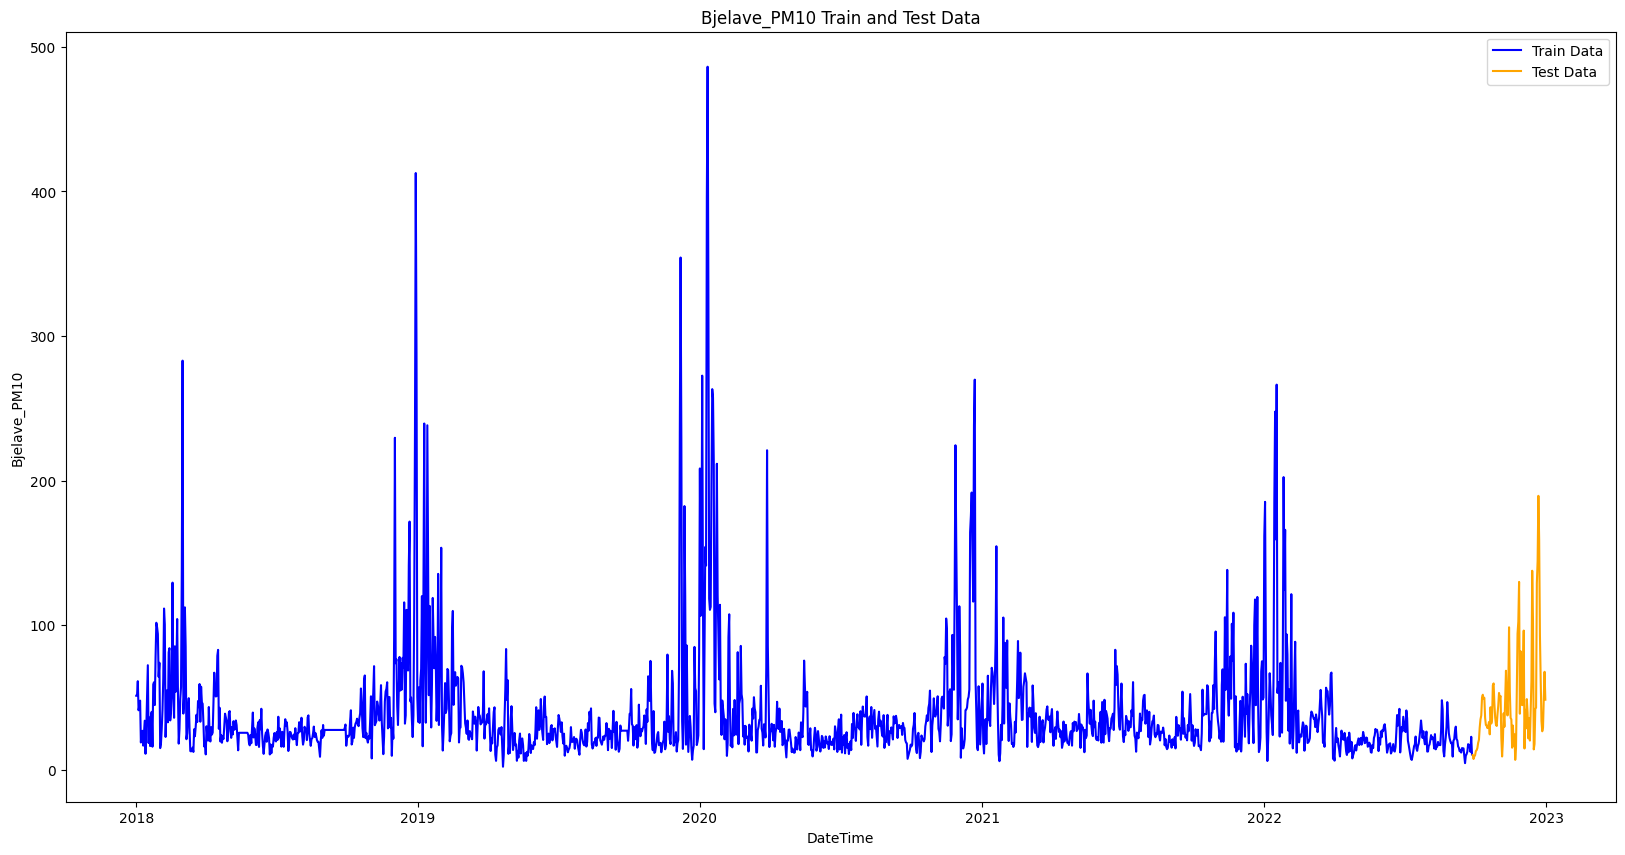

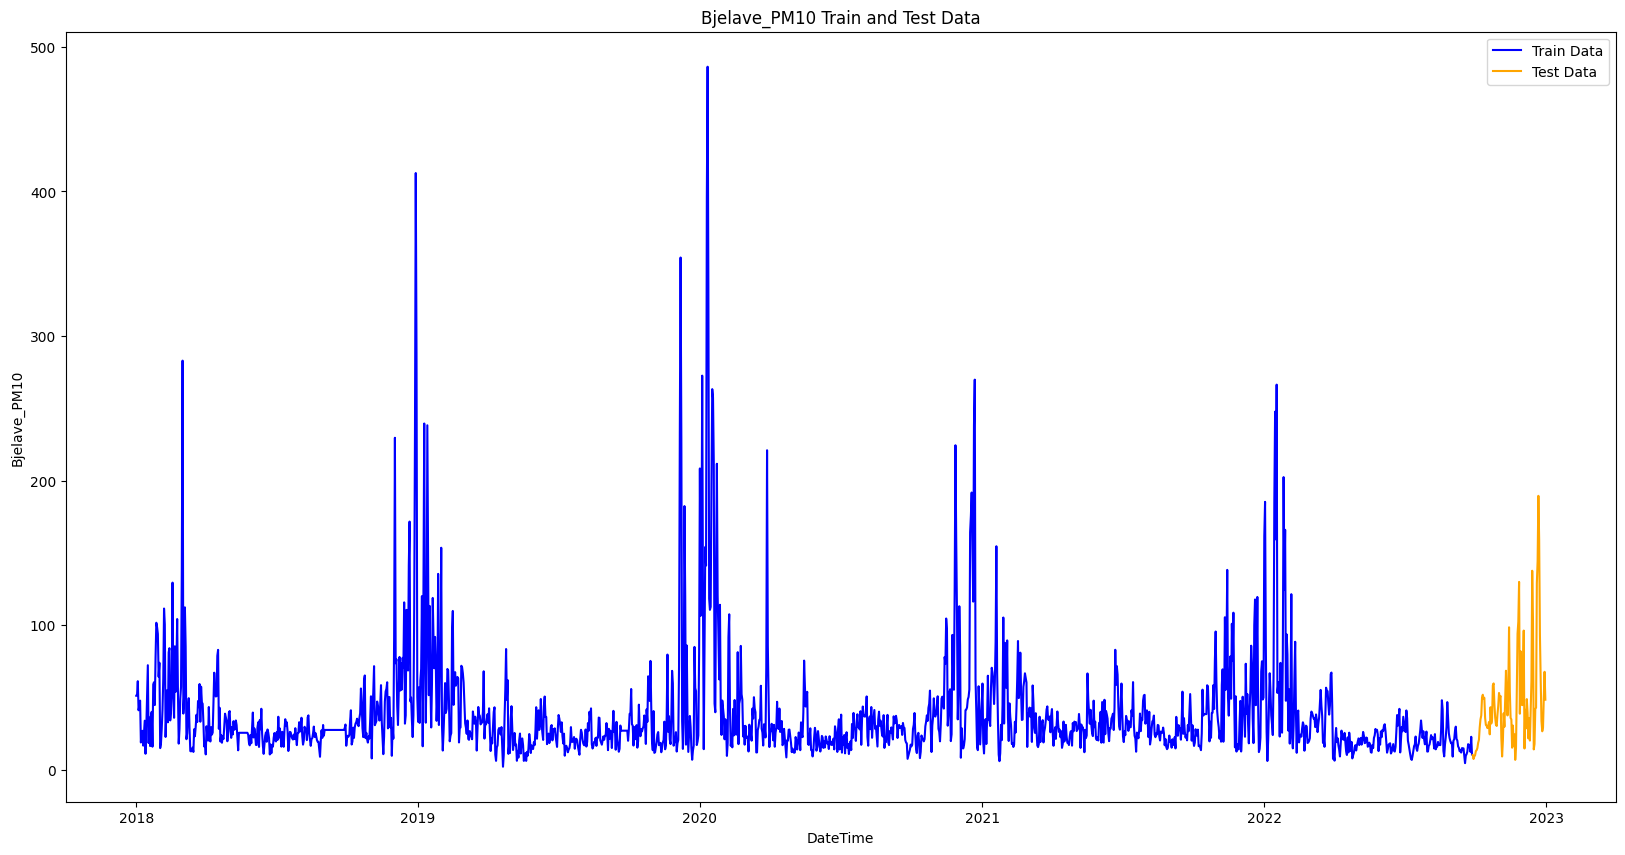

In [148]:
plot_train_test_data(train_data_combined_ws_ninety, test_data_combined_ws_ninety, 'DateTime', 'Bjelave_PM10')
plot_train_test_data(train_PM10_daily_ws_ninety, test_PM10_daily_ws_ninety, 'DateTime', 'Bjelave_PM10')

# Dataset Scaling

In [149]:
from sklearn.preprocessing import MinMaxScaler

train_data_combined_ws_thirty = train_data_combined_ws_thirty.set_index('DateTime')
test_data_combined_ws_thirty = test_data_combined_ws_thirty.set_index('DateTime')

scaler_data_combined_ws_thirty = MinMaxScaler(feature_range=(0,1))
train_data_combined_ws_thirty_scaled = scaler_data_combined_ws_thirty.fit_transform(train_data_combined_ws_thirty)
test_data_combined_ws_thirty_scaled = scaler_data_combined_ws_thirty.transform(train_data_combined_ws_thirty_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [150]:
train_data_combined_ws_sixty = train_data_combined_ws_sixty.set_index('DateTime')
test_data_combined_ws_sixty = test_data_combined_ws_sixty.set_index('DateTime')

scaler_data_combined_ws_sixty = MinMaxScaler(feature_range=(0,1))
train_data_combined_ws_sixty_scaled = scaler_data_combined_ws_sixty.fit_transform(train_data_combined_ws_sixty)
test_data_combined_ws_sixty_scaled = scaler_data_combined_ws_sixty.transform(train_data_combined_ws_sixty_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [151]:
train_data_combined_ws_ninety = train_PM10_daily_ws_ninety.set_index('DateTime')
test_data_combined_ws_ninety = test_PM10_daily_ws_ninety.set_index('DateTime')

scaler_data_combined_ws_ninety = MinMaxScaler(feature_range=(0,1))
train_data_combined_ws_ninety_scaled = scaler_data_combined_ws_ninety.fit_transform(train_data_combined_ws_ninety)
test_data_combined_ws_ninety_scaled = scaler_data_combined_ws_ninety.transform(train_data_combined_ws_ninety_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [152]:
train_PM10_daily_ws_thirty = train_PM10_daily_ws_thirty.set_index('DateTime')
test_PM10_daily_ws_thirty = test_PM10_daily_ws_thirty.set_index('DateTime')

scaler_PM10_daily_ws_thirty = MinMaxScaler(feature_range=(0,1))
train_PM10_daily_ws_thirty = scaler_PM10_daily_ws_thirty.fit_transform(train_PM10_daily_ws_thirty)
test_PM10_daily_ws_thirty = scaler_PM10_daily_ws_thirty.transform(test_PM10_daily_ws_thirty)

In [153]:
train_PM10_daily_ws_sixty = train_PM10_daily_ws_sixty.set_index('DateTime')
test_PM10_daily_ws_sixty = test_PM10_daily_ws_sixty.set_index('DateTime')

scaler_PM10_daily_ws_sixty = MinMaxScaler(feature_range=(0,1))
train_PM10_daily_ws_sixty = scaler_PM10_daily_ws_sixty.fit_transform(train_PM10_daily_ws_sixty)
test_PM10_daily_ws_sixty = scaler_PM10_daily_ws_sixty.transform(test_PM10_daily_ws_sixty)

In [154]:
train_PM10_daily_ws_ninety = train_PM10_daily_ws_ninety.set_index('DateTime')
test_PM10_daily_ws_ninety = test_PM10_daily_ws_ninety.set_index('DateTime')

scaler_PM10_daily_ws_ninety = MinMaxScaler(feature_range=(0,1))
train_PM10_daily_ws_ninety = scaler_PM10_daily_ws_ninety.fit_transform(train_PM10_daily_ws_ninety)
test_PM10_daily_ws_ninety = scaler_PM10_daily_ws_ninety.transform(test_PM10_daily_ws_ninety)

# LSTM for Univariate Time Series Prediction

In [155]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from sklearn.metrics import mean_squared_error, r2_score

In [156]:

def plot_loss(history):
    plt.plot(history.history['loss'], label='train')
    # plt.plot(history.history['val_loss'], label='val')
    plt.title("Loss")
    plt.legend()
    plt.show()


def create_dataset(data, look_back=1):
    """
    Create LSTM dataset by splitting the input data into input sequences (X) and corresponding output values (Y).

    Parameters:
    - data: numpy array, input data.
    - look_back: int, number of previous time steps to use as input variables to predict the next time period (default is 1).

    Returns:
    - X: numpy array, input sequences.
    - Y: numpy array, corresponding output values.
    """
    X, Y = [], []
    for i in range(len(data)-look_back-1):
        X.append(data[i:(i+look_back), 0])
        Y.append(data[(i+look_back), 0])
    return np.array(X), np.array(Y)

def train_model(model, x_train, y_train):
    early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
    # x_val = x_train[-50:]
    # y_val = y_train[-50:]
    # x_train = x_train[:-50]
    # y_train = y_train[:-50]
    # history = model.fit(x_train, y_train, epochs=5, batch_size=256, validation_data=(x_val, y_val), callbacks=[early_stop])
    history = model.fit(x_train, y_train, epochs=10, batch_size=1, verbose=1, callbacks=[early_stop])
    return history


In [157]:
def build_model(look_back, num_features, params):
	model = Sequential()
	model.add(LSTM(units=params["lstm_units"], return_sequences=True, input_shape=(look_back, num_features)))
	# model.add(Dropout(rate=params["dropout"]))
	model.add(LSTM(units=params["lstm_units"], return_sequences=True))
	# model.add(Dropout(rate=params["dropout"]))
	model.add(LSTM(units=params["lstm_units"], return_sequences=True))
	#model.add(LSTM(units=params["lstm_units"], return_sequences=True))
	#model.add(Dropout(rate=params["dropout"]))
	model.add(LSTM(units=params["lstm_units"], return_sequences=True))
	#model.add(Dropout(rate=params["dropout"]))
	model.add(LSTM(units=params["lstm_units"], return_sequences=True))
	#model.add(Dropout(rate=params["dropout"]))
	model.add(LSTM(units=params["lstm_units"], return_sequences=True))
	#model.add(Dropout(rate=params["dropout"]))
	#model.add(LSTM(units=params["lstm_units"], return_sequences=True))
	#model.add(LSTM(units=params["lstm_units2"], return_sequences=True))
	model.add(LSTM(units=params["lstm_units1"], return_sequences=False))
	model.add(Dense(1))
	model.compile(loss=params["loss"], optimizer=params["optimizer"], metrics=[RootMeanSquaredError(), MeanAbsoluteError()])

	return model

In [158]:
# Prepare input and output for LSTM model
look_back = 3
#x_train, y_train = create_dataset(train_data, look_back)

x_train_PM10_daily_ws_thirty, y_train_PM10_daily_ws_thirty = create_dataset(train_PM10_daily_ws_thirty, look_back)
x_train_PM10_daily_ws_sixty, y_train_PM10_daily_ws_sixty = create_dataset(train_PM10_daily_ws_sixty, look_back)
x_train_PM10_daily_ws_ninety, y_train_PM10_daily_ws_ninety = create_dataset(train_PM10_daily_ws_ninety, look_back)

x_test_PM10_daily_ws_thirty, y_test_PM10_daily_ws_thirty = create_dataset(test_PM10_daily_ws_thirty, look_back)
x_test_PM10_daily_ws_sixty, y_test_PM10_daily_ws_sixty = create_dataset(test_PM10_daily_ws_sixty, look_back)
x_test_PM10_daily_ws_ninety, y_test_PM10_daily_ws_ninety = create_dataset(test_PM10_daily_ws_ninety, look_back)

In [159]:
x_train_PM10_daily_ws_thirty.shape

(1787, 3)

In [160]:
# reshape input to be [samples, time steps, features]
#x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
num_features=1
x_train_PM10_daily_ws_thirty = np.reshape(x_train_PM10_daily_ws_thirty, (x_train_PM10_daily_ws_thirty.shape[0], look_back, num_features))
x_train_PM10_daily_ws_sixty = np.reshape(x_train_PM10_daily_ws_sixty, (x_train_PM10_daily_ws_sixty.shape[0], look_back, num_features))
x_train_PM10_daily_ws_ninety = np.reshape(x_train_PM10_daily_ws_ninety, (x_train_PM10_daily_ws_ninety.shape[0], look_back, num_features))

x_test_PM10_daily_ws_thirty = np.reshape(x_test_PM10_daily_ws_thirty, (x_test_PM10_daily_ws_thirty.shape[0], look_back, num_features))
x_test_PM10_daily_ws_sixty = np.reshape(x_test_PM10_daily_ws_sixty, (x_test_PM10_daily_ws_sixty.shape[0], look_back, num_features))
x_test_PM10_daily_ws_ninety = np.reshape(x_test_PM10_daily_ws_ninety, (x_test_PM10_daily_ws_ninety.shape[0], look_back, num_features))

In [161]:
# Training the model
params = {
	"loss": "mean_squared_error",
	"optimizer": "adam",
  "dropout": 0.1,
	"lstm_units": 100,
	"lstm_units3": 100,
	"lstm_units2": 85,
	"lstm_units1": 80,
	"lstm_units0": 30
}

In [162]:
x_train_PM10_daily_ws_thirty.shape

(1787, 3, 1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1787/1787 ━━━━━━━━━━━━━━━━━━━━ 31s 14ms/step - loss: 0.0063 - mean_absolute_error: 0.0437 - root_mean_squared_error: 0.0783
Epoch 2/10
1787/1787 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - loss: 0.0067 - mean_absolute_error: 0.0455 - root_mean_squared_error: 0.0811
Epoch 3/10
1787/1787 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - loss: 0.0052 - mean_absolute_error: 0.0389 - root_mean_squared_error: 0.0719
Epoch 4/10
1787/1787 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - loss: 0.0037 - mean_absolute_error: 0.0339 - root_mean_squared_error: 0.0601
Epoch 5/10
1787/1787 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - loss: 0.0034 - mean_absolute_error: 0.0326 - root_mean_squared_error: 0.0572
Epoch 6/10
1787/1787 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - loss: 0.0037 - mean_absolute_error: 0.0345 - root_mean_squared_error: 0.0609
Epoch 7/10
1787/1787 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - loss: 0.0040 - mean_absolute_error: 0.0346 - root_mean_squared_error: 0.0626
Epoch 8/10
1787/1787 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step

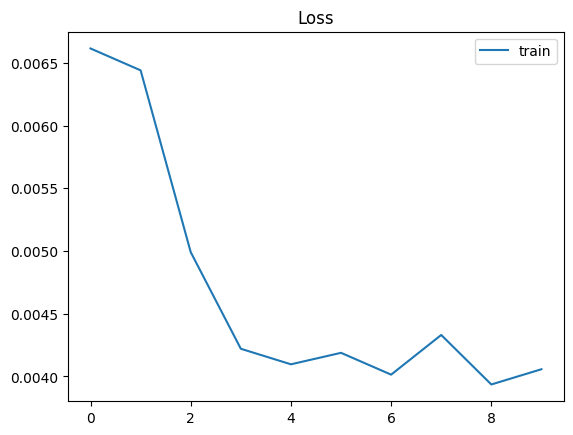

In [163]:
model = build_model(look_back, num_features, params)
history = train_model(model, x_train_PM10_daily_ws_thirty, y_train_PM10_daily_ws_thirty)
plot_loss(history)

In [164]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_29 (LSTM)                  │ (None, 3, 100)         │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_30 (LSTM)                  │ (None, 3, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_31 (LSTM)                  │ (None, 3, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_32 (LSTM)                  │ (None, 3, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_33 (LSTM)                  │ (None, 3, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_34 (LSTM)                  │ (None, 3, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_35 (LSTM)                  │ (None, 80)             │        57,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            81 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,502,405 (5.73 MB)

 Trainable params: 500,801 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,001,604 (3.82 MB)

In [165]:
testPredict_PM10_daily_ws_thirty_scaled = model.predict(x_test_PM10_daily_ws_thirty)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step


In [166]:
testPredict_PM10_daily_ws_thirty = scaler_PM10_daily_ws_thirty.inverse_transform(testPredict_PM10_daily_ws_thirty_scaled)

In [167]:
y_test_PM10_daily_ws_thirty_unscaled = scaler_PM10_daily_ws_thirty.inverse_transform(y_test_PM10_daily_ws_thirty.reshape(-1, 1))

In [168]:
rmse = np.sqrt(mean_squared_error(y_test_PM10_daily_ws_thirty_unscaled, testPredict_PM10_daily_ws_thirty))
mae = mean_absolute_error(y_test_PM10_daily_ws_thirty_unscaled, testPredict_PM10_daily_ws_thirty)
r2 = r2_score(y_test_PM10_daily_ws_thirty_unscaled, testPredict_PM10_daily_ws_thirty)

print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)

RMSE: 36.51894921522029
MAE: 26.330601179172024
R2 Score: 0.3554883214703234


30 Day Prediction Window

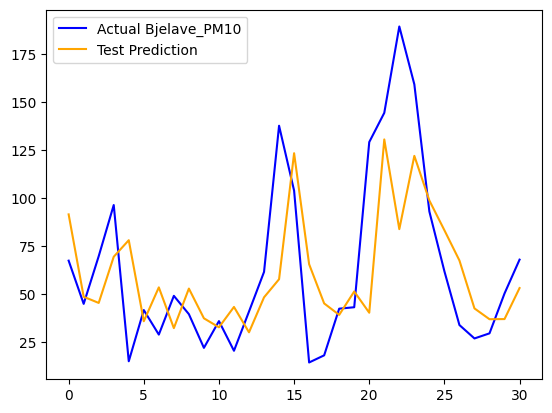

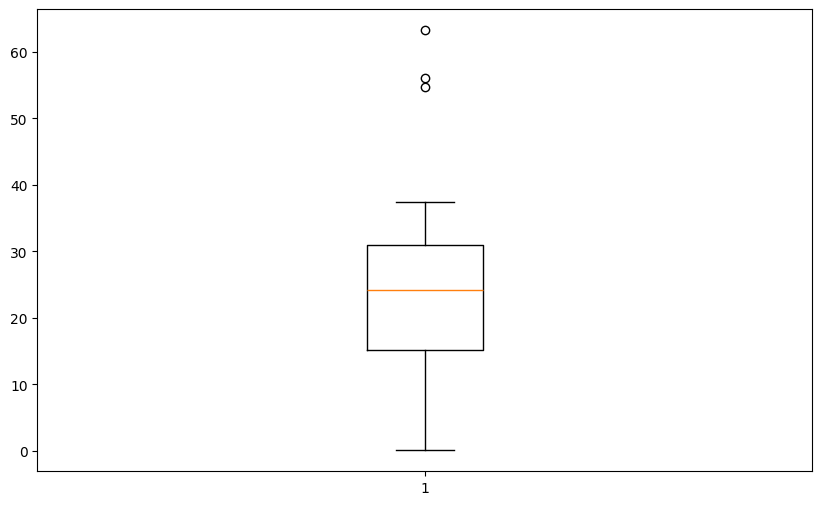

In [169]:
# VRATITI SE NA OVO
plt.plot(y_test_PM10_daily_ws_thirty_unscaled, label='Actual Bjelave_PM10', color='blue')
plt.plot(testPredict_PM10_daily_ws_thirty, label='Test Prediction', color='orange')
plt.legend()
plt.show()

plot_boxplot(testPredict_PM10_daily_ws_thirty, y_test_PM10_daily_ws_thirty_unscaled[0])

In [170]:
last_sequence = x_train_PM10_daily_ws_thirty[-1:]

In [171]:
walk_forward_predictions_scaled = []

In [172]:
for _ in range(len(y_test_PM10_daily_ws_thirty)):
    next_pred_scaled = model.predict(last_sequence, verbose=0)
    walk_forward_predictions_scaled.append(next_pred_scaled[0, 0])
    new_sequence_step = next_pred_scaled.reshape(1, 1, num_features)
    last_sequence = np.append(last_sequence[:, 1:, :], new_sequence_step, axis=1)

In [173]:
walk_forward_predictions_unscaled = scaler_PM10_daily_ws_thirty.inverse_transform(np.array(walk_forward_predictions_scaled).reshape(-1, 1))

In [174]:
rmse_wf = np.sqrt(mean_squared_error(y_test_PM10_daily_ws_thirty_unscaled, walk_forward_predictions_unscaled))
mae_wf = mean_absolute_error(y_test_PM10_daily_ws_thirty_unscaled, walk_forward_predictions_unscaled)
r2_wf = r2_score(y_test_PM10_daily_ws_thirty_unscaled, walk_forward_predictions_unscaled)

print("RMSE:", rmse_wf)
print("MAE:", mae_wf)
print("R2 Score:", r2_wf)

RMSE: 50.21773309961082
MAE: 32.88232332502168
R2 Score: -0.21873267183859202


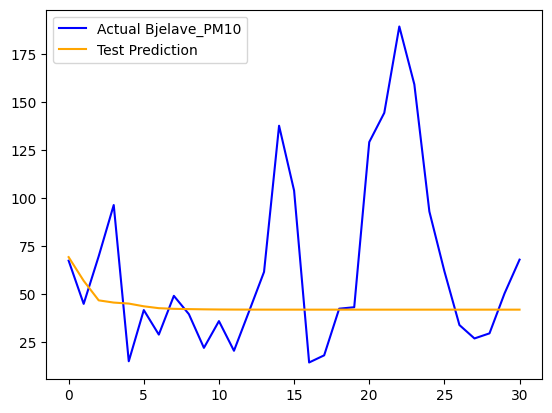

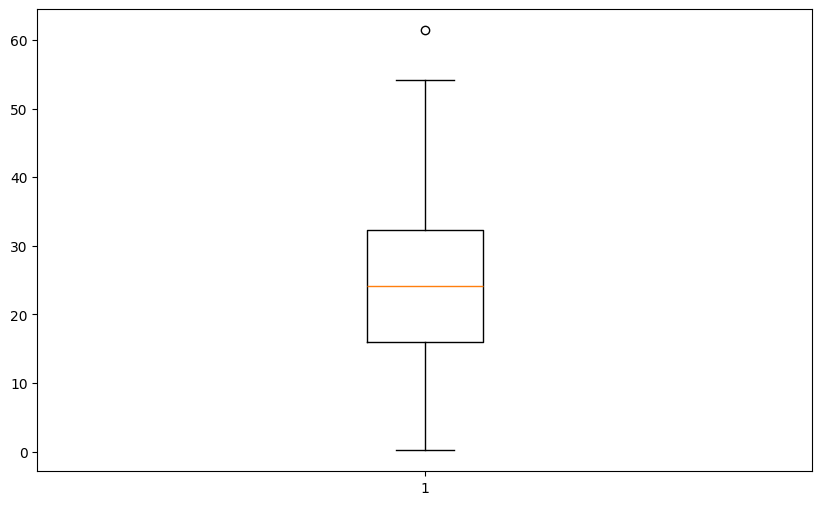

In [175]:
plt.plot(y_test_PM10_daily_ws_thirty_unscaled, label='Actual Bjelave_PM10', color='blue')
plt.plot(walk_forward_predictions_unscaled, label='Test Prediction', color='orange')
plt.legend()
plt.show()

plot_boxplot(testPredict_PM10_daily_ws_thirty, walk_forward_predictions_unscaled[0])

60 Day Prediction Window

90 Day Prediction Window

# LSTM for Multivariate Time Series Prediction

In [342]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='train')
    # plt.plot(history.history['val_loss'], label='val')
    plt.title("Loss")
    plt.legend()
    plt.show()


def create_dataset(data, look_back=1):
    """
    Create LSTM dataset by splitting the input data into input sequences (X) and corresponding output values (Y).

    Parameters:
    - data: numpy array, input data.
    - look_back: int, number of previous time steps to use as input variables to predict the next time period (default is 1).

    Returns:
    - X: numpy array, input sequences.
    - Y: numpy array, corresponding output values.
    """
    X, Y = [], []
    for i in range(len(data)-look_back-1):
        X.append(data[i:(i+look_back), 0])
        Y.append(data[(i+look_back), 0])
    return np.array(X), np.array(Y)

# # Define model
# def build_model(train_shape, look_back):
#     model = Sequential()
#     model.add(LSTM(100, return_sequences=True, input_shape=(train_shape, look_back)))
#     model.add(Dense(1))
#     model.compile(loss='mean_squared_error', optimizer='adam')
#     # model.add(LSTM(100, input_shape=(train_shape, look_back), return_sequences=True))
#     # model.add(Dropout(0.2))
#     # model.add(LSTM(50, return_sequences=True))
#     # model.add(Dropout(0.2))
#     # model.add(LSTM(50, return_sequences=False))
#     # model.add(Dense(25))
#     # model.add(Dense(1))
#     # model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
#     return model

def create_dataset_multi_feature_multi_output(data, target_col_index, look_back, forecast_horizon):
    X, Y = [], []
    for i in range(len(data) - look_back - forecast_horizon + 1):
        input_seq = data[i : (i + look_back)]
        X.append(input_seq)

        output_seq = data[(i + look_back) : (i + look_back + forecast_horizon), target_col_index]
        Y.append(output_seq)

    return np.array(X), np.array(Y)


def build_model_multi_feature_multi_output(look_back, num_features, forecast_horizon, params):
    model = Sequential([
        Input(shape=(look_back, num_features)),

        LSTM(units=params["lstm_units"], return_sequences=True),
        Dropout(params["dropout"]),

        LSTM(units=params["lstm_units"], return_sequences=False),
        Dropout(params["dropout"]),

        Dense(100, activation='relu'),

        Dense(forecast_horizon)
    ])

    model.compile(loss=params["loss"], optimizer=params["optimizer"], metrics=[RootMeanSquaredError(), MeanAbsoluteError()])
    return model

def train_model(model, x_train, y_train):
    early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
    # x_val = x_train[-50:]
    # y_val = y_train[-50:]
    # x_train = x_train[:-50]
    # y_train = y_train[:-50]
    # history = model.fit(x_train, y_train, epochs=5, batch_size=256, validation_data=(x_val, y_val), callbacks=[early_stop])
    history = model.fit(x_train, y_train, epochs=10, batch_size=1, verbose=1, callbacks=[early_stop])
    return history

In [343]:
params = {
    "loss": "mean_squared_error",
    "optimizer": "adam",
    "dropout": 0.2,
    "lstm_units": 100,
}

In [344]:
target_col_index=test_data_combined_ws_thirty.columns.get_loc('Bjelave_PM10')
forecast_horizon=31

In [345]:
x_train, y_train = create_dataset_multi_feature_multi_output(train_data_combined_ws_thirty_scaled, target_col_index, look_back, forecast_horizon)
x_test, y_test = create_dataset_multi_feature_multi_output(test_data_combined_ws_thirty_scaled, target_col_index, look_back, forecast_horizon)

print(f"x_train.shape: {x_train.shape}")
print(f"y_train.shape: {y_train.shape}")

x_train.shape: (1758, 3, 11)
y_train.shape: (1758, 31)


In [346]:
last_known_sequence = train_data_combined_ws_thirty_scaled[-look_back:].reshape(1, look_back, num_features)

ValueError: cannot reshape array of size 33 into shape (1,3,1)

In [ ]:
prediction_scaled = model.predict(last_known_sequence)


In [ ]:
predictions_placeholder_matrix = np.zeros((forecast_horizon, num_features))
predictions_placeholder_matrix[:, target_col_index] = prediction_scaled[0]
prediction_unscaled = scaler_data_combined_ws_thirty.inverse_transform(predictions_placeholder_matrix)[:, target_col_index]

actual_30_days_scaled = y_test[0]
actuals_placeholder_matrix = np.zeros((forecast_horizon, num_features))
actuals_placeholder_matrix[:, target_col_index] = actual_30_days_scaled
actual_30_days_unscaled = scaler_data_combined_ws_thirty.inverse_transform(actuals_placeholder_matrix)[:, target_col_index]
